In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import numpy as np
from k_means import KMeans
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [2]:
class CustomDataTest():
    
    def __init__(self, directory:str):
        self.path_imgs = glob.glob(directory + "*")
        print(f"Total de imagens: {len(self.path_imgs)}")
        
    def __getitem__(self, index:int):
        return self.path_imgs[index] 
    
    def generate_region(self):
        images_area = []
        for image_path in self.path_imgs:
            images_area.append((self.feature_extraction(image_path) / 255.0).sum())
        

        return np.array(images_area, dtype=np.float16)
            
    def feature_extraction (self, path_image): 
        image = cv.imread(path_image)
        img_blur = cv.GaussianBlur(image, (3,3), 0) 
        edges = cv.Canny(image=img_blur, threshold1=100, threshold2=200) 
        
        return edges
    
    def __call__(self):
        total = self.generate_region()
        return np.array(total, dtype=np.float32)



Total de imagens: 32


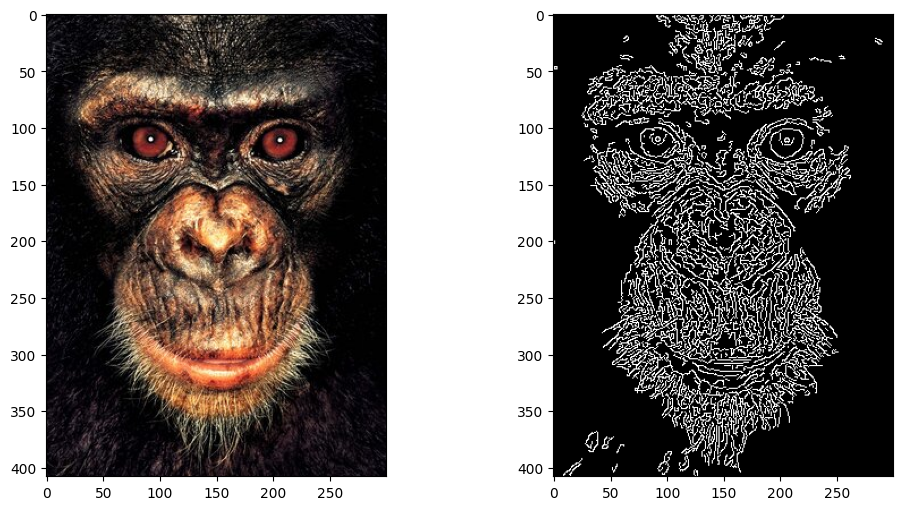

In [3]:
data = CustomDataTest("Apes/")
datex = data()
image_path = data.__getitem__(0)

image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_sobel = data.feature_extraction(image_path)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image_sobel, cmap="gray")
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
n_cluster = 5
model = KMeans(n_cluster=n_cluster, max_iter=10)
model.fit(datex)

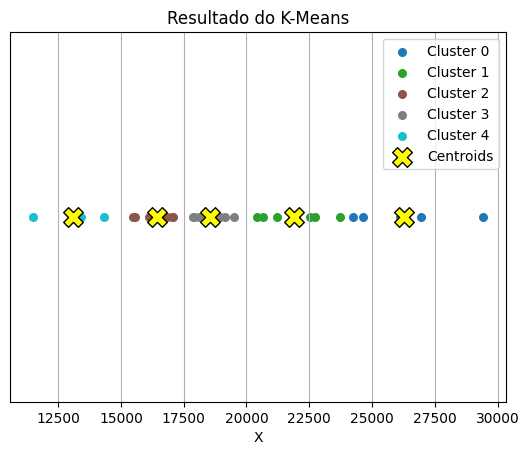

In [5]:
cmap = colormaps.get_cmap('tab10').resampled(n_cluster)
colors = [cmap(i) for i in range(n_cluster)]

# criar eixo y ilustrativo
y_base = np.zeros_like(datex)

# Plotar os pontos de cada cluster
for i in range(n_cluster):
    plt.scatter(datex[model.labels == i], 
                y_base[model.labels == i], 
                s=30, color=colors[i], label=f'Cluster {i}')

plt.scatter(model.centroids, 
            np.zeros_like(model.centroids), 
            s=200, color='yellow', edgecolor='black', label='Centroids', marker='X')

plt.title('Resultado do K-Means')
plt.xlabel('X')
plt.yticks([])  # Esconde o eixo Y
plt.legend()
plt.grid(True)
plt.show()
